In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
from tensorflow import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential
# useful for building neural networks then interacting with

import os
# useful for manipulating folders and files

import cv2
from PIL import Image
# to manipulate images

import numpy as np
np.random.seed(1000)# for results reproduceability
# useful for manipulating matrix and multidimensional arrays

import matplotlib.pyplot as plt
# useful for plotting and showing  images


# To download checkpoints, Keras models, TFLite models
from google.colab import files

# Life is incomplete without this statement!
import tensorflow as tf


import os
import datetime

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:

image_directory = os.listdir('/gdrive/MyDrive/Data/UTKFace/') 

In [ ]:
image_path='/gdrive/MyDrive/DataSyrine/UTKFace/'

SIZE = 224  # our neural nets expect input data of same format so we will use resize our images to (size x size) 
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
gender_label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.
age_label=[]

In [ ]:
for i, image_name in enumerate(image_directory): 

  if (image_name.split('.')[1] == 'jpg') and i<9000:
    image =  tf.keras.preprocessing.image.load_img(
      image_path + image_name, grayscale=False, color_mode='rgb', target_size=(SIZE,SIZE))
    input_arr = keras.preprocessing.image.img_to_array(image)
    dataset.append(input_arr)
    gender_label.append(image_name.split('_')[1]) 


KeyboardInterrupt: ignored

In [ ]:
len(gender_label)

7185

In [ ]:
len(dataset)

7185

In [ ]:
dataset[0].shape

(224, 224, 3)

In [ ]:
dataset[0][30,30] #pixel x=30 , y=30 R G B 

array([176., 110.,  76.], dtype=float32)

In [ ]:
gender_label[0]

'0'

In [ ]:
NUM_CLASSES=2

In [ ]:
IMG_SIZE=224

In [ ]:

img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)


In [ ]:
# Garbage Collector - use it like gc.collect()
import gc


gc.collect()

147

In [ ]:
NUM_CLASSES

2

In [ ]:

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    #x = img_augmentation(inputs)
model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
#model.trainable = False
model.trainable = True



In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(model.layers))


Number of layers in the base model:  237


In [ ]:
# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
    # Rebuild top
x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = layers.BatchNormalization()(x)

top_dropout_rate = 0.2
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
model = tf.keras.Model(inputs, outputs, name="EfficientNet")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
  

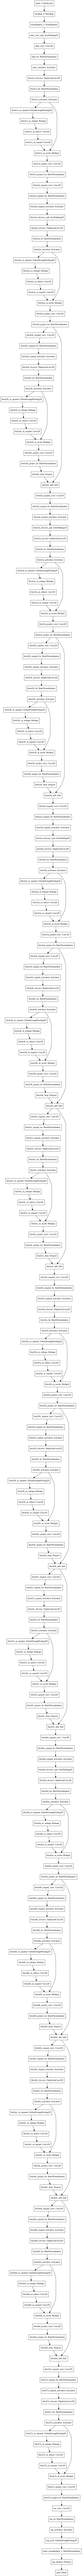

In [ ]:
tf.keras.utils.plot_model(model)


In [ ]:
type(dataset[0])

numpy.ndarray

In [ ]:
type(gender_label)

list

In [ ]:
label=[]
for i in gender_label:
  label.append(int(i))

In [ ]:
label[0]

0

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # transforms labels from a number to 1-D array of 0s and 1s 

# we will split our **dataset** and its corresponding labels to two parts:
#80% will be used to train our model, and 20% will be used to test how good our trained model is. 
#X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(gender_label)), test_size = 0.20, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

In [ ]:
y_train = keras.utils.to_categorical(y_train)

In [ ]:
epochs = 20  # @param {type: "slider", min:10, max:100}
hist = model.fit(np.array(X_train),np.array(y_train), epochs=epochs,  validation_split = 0.2, verbose=2,batch_size=30)

Epoch 1/20
154/154 - 28s - loss: 1.1709 - accuracy: 0.6588 - val_loss: 30698.9922 - val_accuracy: 0.3565
Epoch 2/20
154/154 - 18s - loss: 0.5702 - accuracy: 0.7977 - val_loss: 50.8167 - val_accuracy: 0.3574
Epoch 3/20
154/154 - 18s - loss: 0.4238 - accuracy: 0.8538 - val_loss: 1.1453 - val_accuracy: 0.8043
Epoch 4/20
154/154 - 18s - loss: 0.2713 - accuracy: 0.9034 - val_loss: 0.3187 - val_accuracy: 0.8783
Epoch 5/20
154/154 - 18s - loss: 0.6899 - accuracy: 0.8328 - val_loss: 20.5791 - val_accuracy: 0.3696
Epoch 6/20
154/154 - 18s - loss: 0.3961 - accuracy: 0.8676 - val_loss: 161.3352 - val_accuracy: 0.4426
Epoch 7/20
154/154 - 18s - loss: 0.3289 - accuracy: 0.8952 - val_loss: 0.2292 - val_accuracy: 0.9252
Epoch 8/20
154/154 - 18s - loss: 0.2710 - accuracy: 0.9265 - val_loss: 0.6587 - val_accuracy: 0.8913
Epoch 9/20
154/154 - 18s - loss: 0.2080 - accuracy: 0.9287 - val_loss: 0.1899 - val_accuracy: 0.9322
Epoch 10/20
154/154 - 18s - loss: 0.1812 - accuracy: 0.9415 - val_loss: 0.2660 - va

In [ ]:
 model.save("/gdrive/MyDrive/Data")